<a href="https://colab.research.google.com/github/Surajk7725/OpenCV/blob/main/OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Image Manipulations**
1.   Accessing and manipulating images pixels
1.   Image resizing
2.   Cropping
2.   Flipping



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

[[[ 66  66  66]
  [252 252 252]
  [255 255 255]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 [[ 66  66  66]
  [252 252 252]
  [255 255 255]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 [[ 66  66  66]
  [252 252 252]
  [255 255 255]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 ...

 [[  6   6  84]
  [111 109 191]
  [ 97  92 183]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]

 [[  5   5  83]
  [111 109 191]
  [ 97  92 183]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]

 [[  5   5  83]
  [110 108 190]
  [ 96  91 182]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]]


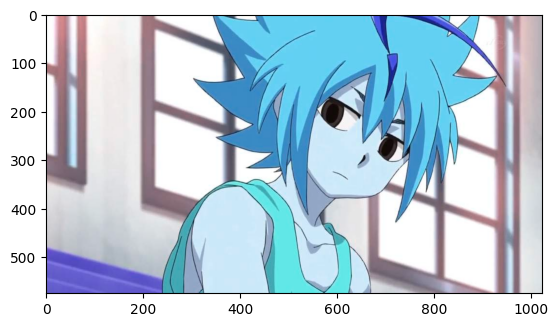

In [ ]:
image = cv2.imread("2.jpg",1)
print(image)
plt.imshow(image)

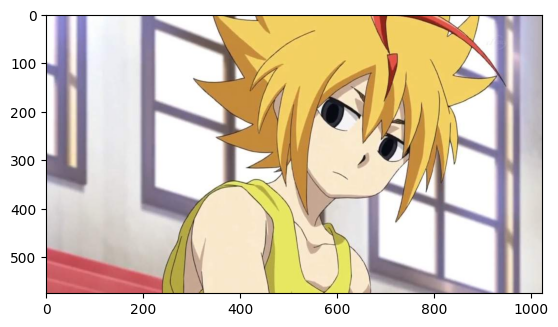

In [ ]:
plt.imshow(image[:,:,::-1])

**Accessing Individual Pixels**

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

In [ ]:
# print the first pixel of the first black box
print(image[0, 0])

# print the first white pixel to the right of the first black box
print(image[0, 6])

[66 66 66]
[255 255 255]


**Modifying Image Pixels**



[[[ 66  66  66]
  [252 252 252]
  [255 255 255]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 [[ 66  66  66]
  [252 252 252]
  [255 255 255]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 [[ 66  66  66]
  [252 252 252]
  [200 100 200]
  ...
  [183 176 181]
  [182 176 181]
  [181 175 180]]

 ...

 [[  6   6  84]
  [111 109 191]
  [ 97  92 183]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]

 [[  5   5  83]
  [111 109 191]
  [ 97  92 183]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]

 [[  5   5  83]
  [110 108 190]
  [ 96  91 182]
  ...
  [217 222 225]
  [217 222 225]
  [216 221 224]]]


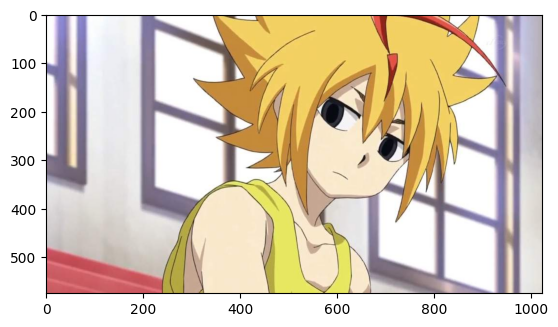

In [ ]:
img_copy = image.copy()
img_copy[2,2] = [200,100,200]
img_copy[3,7] = [200,200,200]
img_copy[5,2] = [255,0,255]

plt.imshow(img_copy[:,:,::-1])
print(img_copy)

**Cropping Images**

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

***Function Syntax*** : cropped_region = image[200:400, 300:600]

1. 200:400 means specifies the range of rows to include.
2. 300:600 means specifies the range of columns to include.

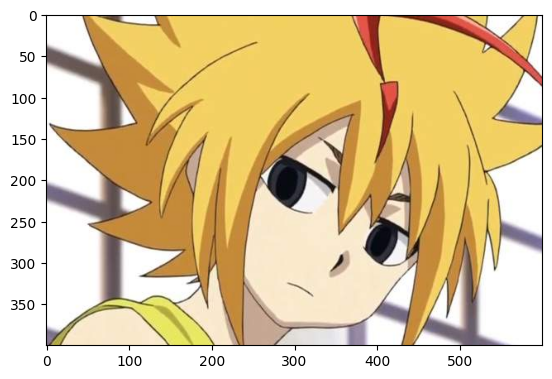

In [ ]:
cropped_region = image[0:400, 300:900]
plt.imshow(cropped_region[:,:,::-1])

**Resizing Images**

***Function Syntax*** : dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )

where,
1.   *`dst`* : output image size
1.   *`src`* : input image
1.   *`fx`*: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
2.   *`fy`*: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜



**Method 1: Specifying Scaling Factor using fx and fy**

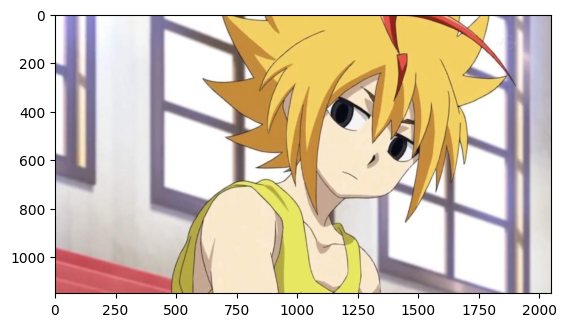

In [ ]:
resize_img = cv2.resize(image, None, fx=2, fy=2)
plt.imshow(resize_img[:,:,::-1])

**Medthod 2: Specifying exact size of the output image**

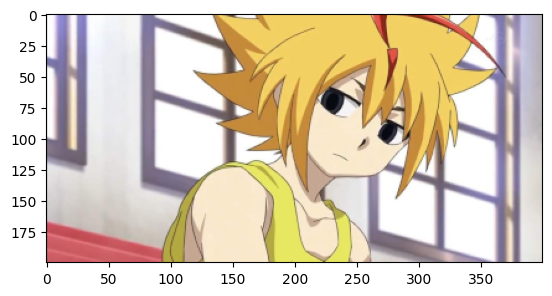

In [ ]:
desired_width = 400
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_img = cv2.resize(image, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_img[:,:,::-1])

**Resize while maintaining aspect ratio**

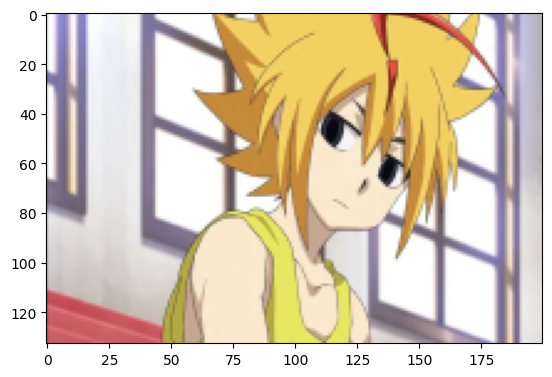

In [ ]:
desired_width = 200
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_region = cv2.resize(image, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_region[:,:,::-1])

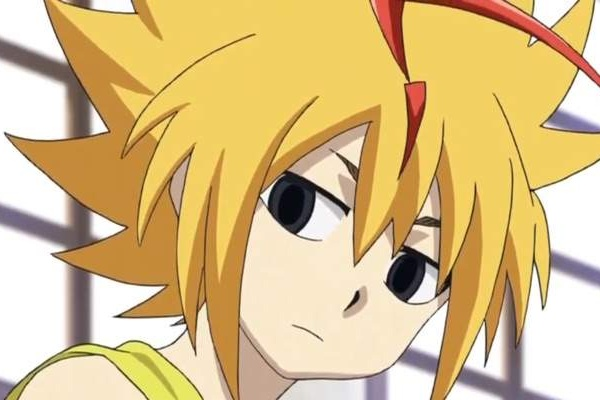

In [ ]:
cv2.imwrite("hoya.jpg",cropped_region)
Image(filename="hoya.jpg")

**Flipping Images**

The function `flip` flips the array in one of three different ways (row and column indices are 0-based):

***Function Syntax*** : dst = cv.flip( src, flipCode )

where,
1.   *`dst`*: output array of the same size and type as src.
1.   *`src`*: input image
2.   *`flipCode`*: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.



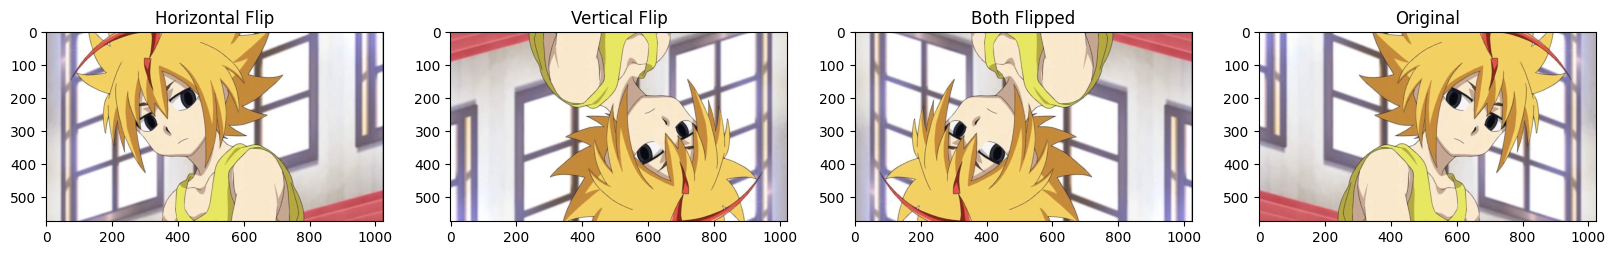

In [ ]:
image = image[:,:,::-1]
img_horz = cv2.flip(image, 1)
img_vert = cv2.flip(image, 0)
img_both = cv2.flip(image, -1)

# Show the images
plt.figure(figsize=(20, 5))

plt.subplot(141);
plt.imshow(img_horz);
plt.title("Horizontal Flip");

plt.subplot(142);
plt.imshow(img_vert);
plt.title("Vertical Flip");

plt.subplot(143);
plt.imshow(img_both);
plt.title("Both Flipped");

plt.subplot(144);
plt.imshow(image);
plt.title("Original");

**Basic Image Enhancement Using Mathematical Operations**

Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:
*  Arithmetic Operations like addition, multiplication
*   Thresholding & Masking
*   Bitwise Operations like OR, AND, XOR


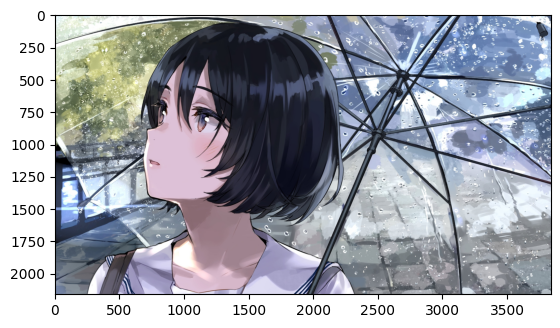

In [ ]:
img_bgr = cv2.imread("86.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

**Addition or Brightness**

The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

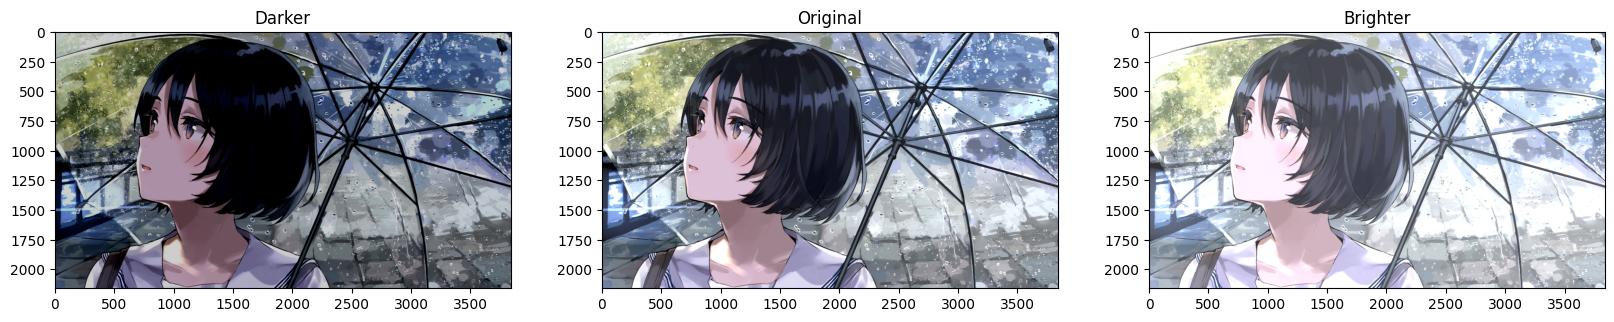

In [ ]:
# 'np.ones' is a NumPy function that creates a new array filled with ones.
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)


# Show the images
plt.figure(figsize=[20, 5])

plt.subplot(131);
plt.imshow(img_rgb_darker);
plt.title("Darker");

plt.subplot(132);
plt.imshow(img_rgb);
plt.title("Original");

plt.subplot(133);
plt.imshow(img_rgb_brighter);
plt.title("Brighter");

**Multiplication or Contrast**

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

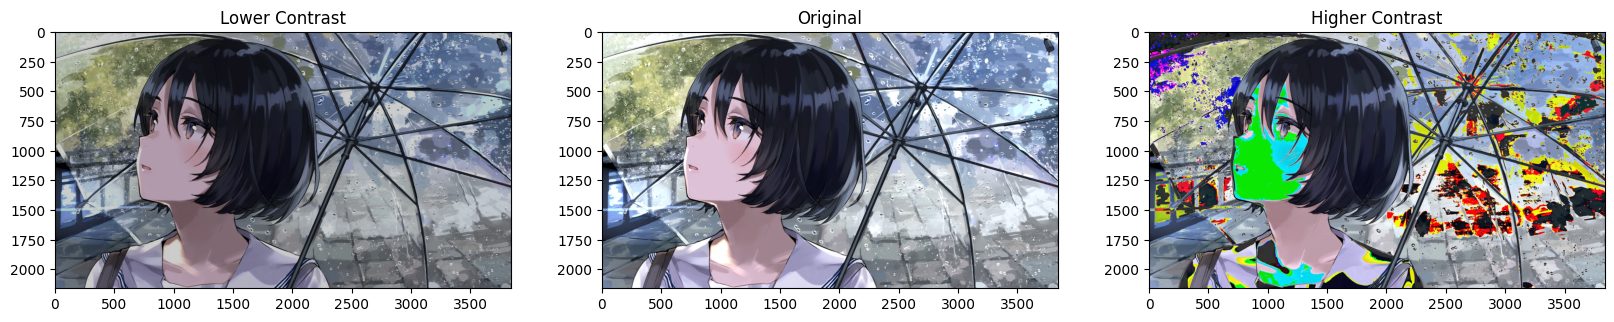

In [ ]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[20,5])

plt.subplot(131);
plt.imshow(img_rgb_darker);
plt.title("Lower Contrast");

plt.subplot(132);
plt.imshow(img_rgb);
plt.title("Original");

plt.subplot(133);
plt.imshow(img_rgb_brighter);
plt.title("Higher Contrast");

The weird colors in some areas of the image after multiplication.
The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue.

**Handling Overflow using np.clip**

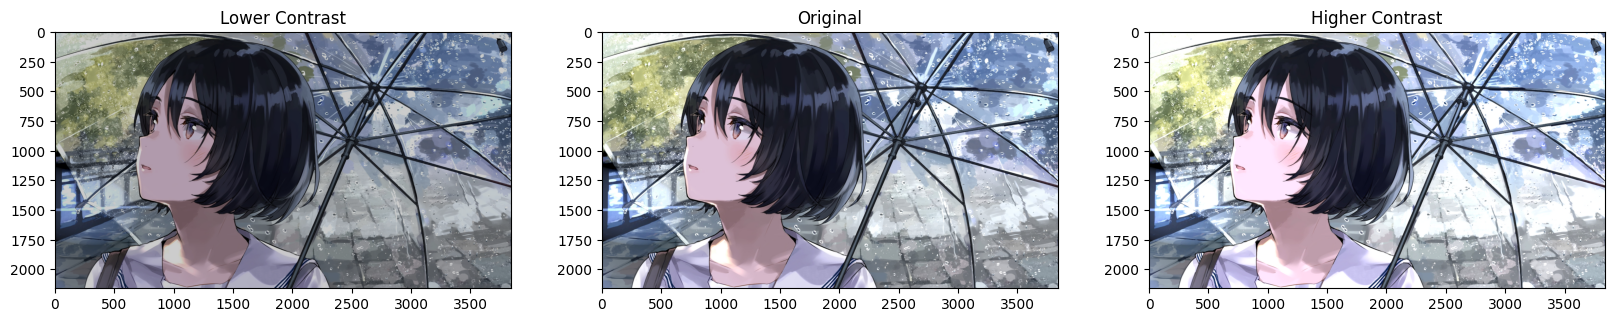

In [ ]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Show the images
plt.figure(figsize=[20,5])

plt.subplot(131);
plt.imshow(img_rgb_lower);
plt.title("Lower Contrast");

plt.subplot(132);
plt.imshow(img_rgb);
plt.title("Original");

plt.subplot(133);
plt.imshow(img_rgb_higher);
plt.title("Higher Contrast");

**Image Thresholding**

 A binary image is a type of digital image that consists of pixels that are either black or white, with no other possible intensity values. In a binary image, each pixel is typically represented by a single bit (0 or 1), where 0 usually represents black and 1 represents white. So, Image Thresholding is used to create Binary Images from grayscale images.

1. ***Function Syntax*** : retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )

where,
1.   *`src`*: input array (multiple-channel, 8-bit or 32-bit floating point).
1.   *`thresh`*: threshold value.
2.   *`maxval`*: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
2.   *`type`*: thresholding type (see ThresholdTypes).


2.  ***Function Syntax*** : dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )

where,
1.   *`src`*: Source 8-bit single-channel image.
2.   *`maxValue`*: Non-zero value assigned to the pixels for which the condition is satisfied
1.   *`adaptiveMethod`*: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
2.   *`thresholdType`*: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
1.   *`blockSize`*: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
2.   *`C`*: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.







(2160, 3840)
100.0


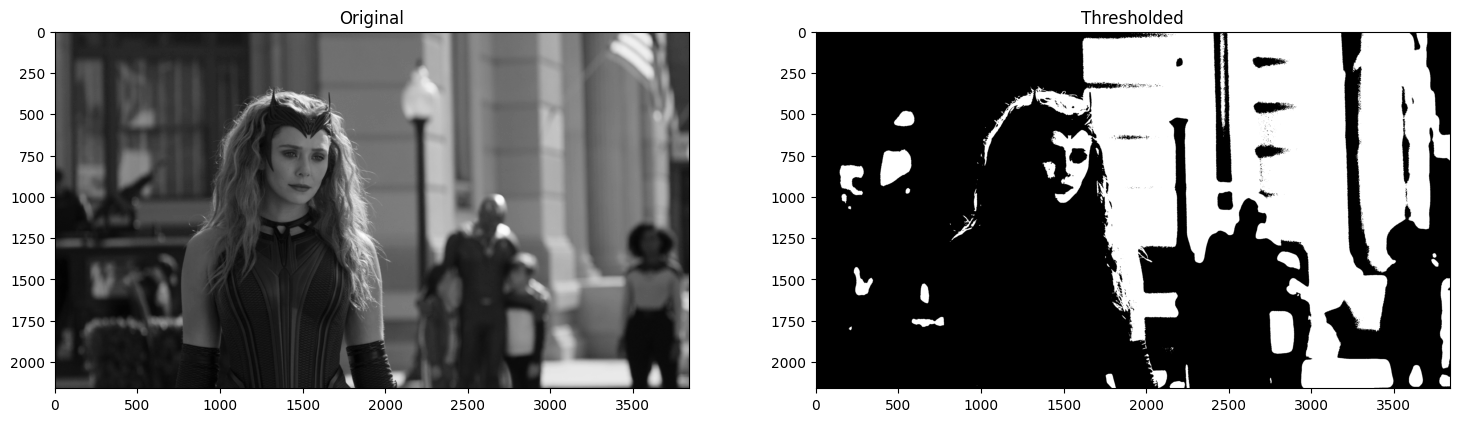

In [ ]:
img_read = cv2.imread("49.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);
plt.imshow(img_read, cmap="gray");
plt.title("Original")

plt.subplot(122);
plt.imshow(img_thresh, cmap="gray");
plt.title("Thresholded")

print(img_thresh.shape)
print(retval)

**Types of ThresholdType**
1.   `cv2.THRESH_BINARY` : Turns the image into a black and white picture.
1.   `cv2.THRESH_BINARY_INV` : Similar to binary thresholding, but flips the colors. Bright pixels become black, and dark pixels become white.
2.   `cv2.THRESH_TRUNC` : Keeps the image as is, except for pixels brighter than the threshold, which are set to the threshold value. This makes bright areas less bright.
2.   `cv2.THRESH_TOZERO` :  Makes all pixels below the threshold black, but keeps brighter pixels unchanged.
5.  `cv2.THRESH_TOZERO_INV` : The opposite of Threshold to Zero. Makes all pixels above the threshold black, but keeps darker pixels unchanged.



**Application: Sheet Music Reader**

Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

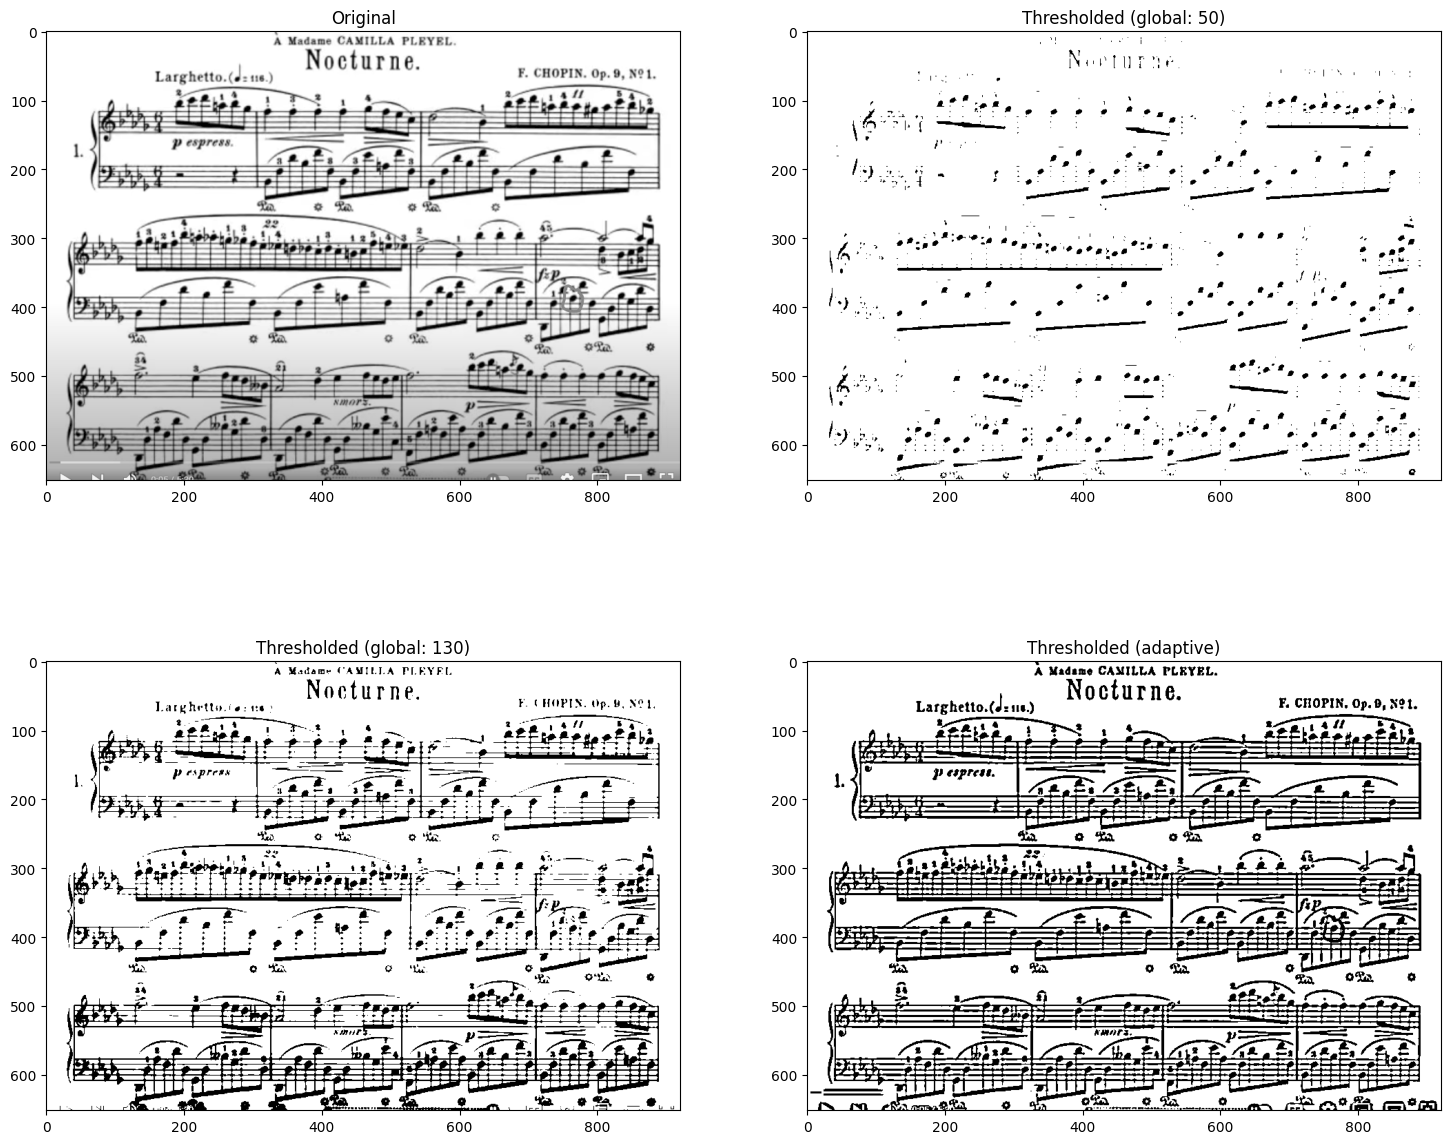

In [ ]:
# Read the original image
img_read = cv2.imread("music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

**Bitwise Operations**

***Function Syntax*** : Example API for `cv2.bitwise_and()`. Others include: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )

The function has 2 required arguments:
1. *`src1`* : first input array or a scalar.
2. *`src2`* : second input array or a scalar.
3. *`mask`*: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

(575, 1024, 3)


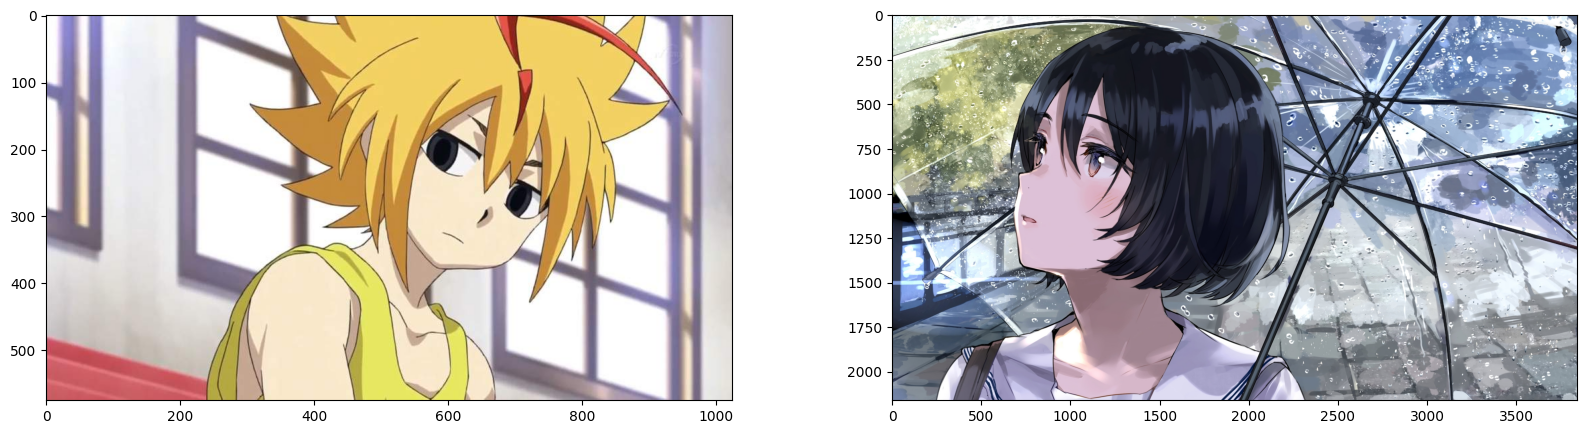

In [3]:
img1 = cv2.imread("2.jpg",1)
img2 = cv2.imread("86.jpg",1)
img1 = img1[:,:,::-1]
img2 = img2[:,:,::-1]
plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img1)
plt.subplot(122);plt.imshow(img2)
print(img1.shape)

*`Note`* :If the sizes of image-1 and image-2 are not same.Then you need to do this.Resize img2 to match the dimensions of img1

```img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))```




In [4]:
# Resize img2 to match the dimensions of img1
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

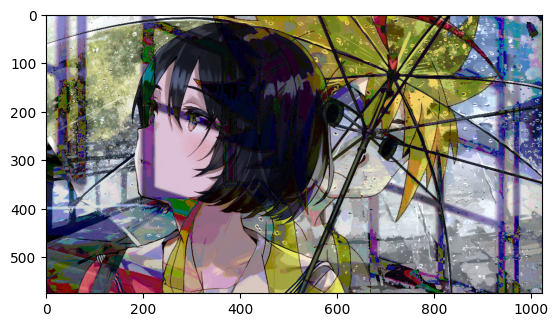

In [5]:
result = cv2.bitwise_and(img1, img2_resized, mask=None)
plt.imshow(result)

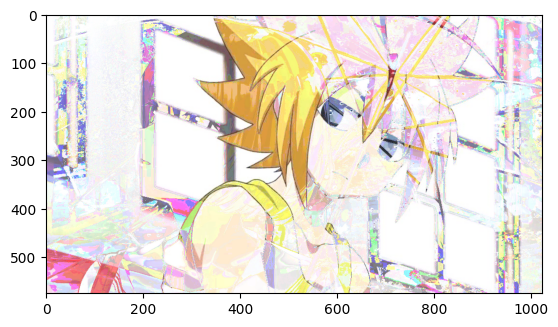

In [6]:
result = cv2.bitwise_or(img1, img2_resized, mask=None)
plt.imshow(result)

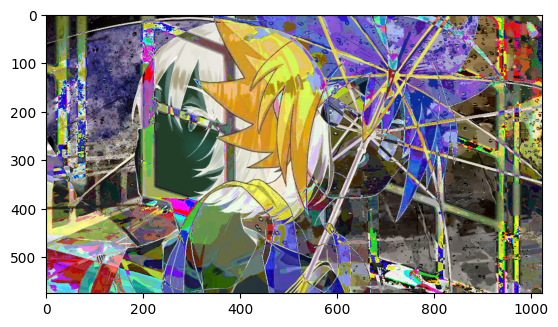

In [7]:
result = cv2.bitwise_xor(img1, img2_resized, mask=None)
plt.imshow(result)

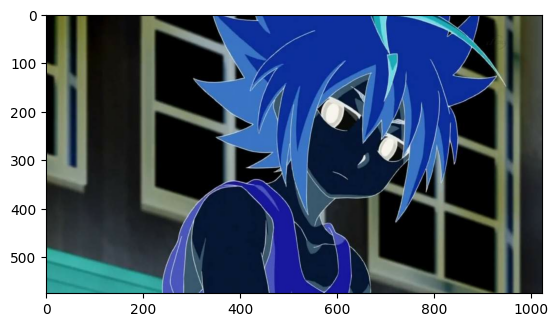

In [14]:
result = cv2.bitwise_not(img1, mask=None)
plt.imshow(result)

**Application: Logo Manipulation**

1. **Read Foreground image**

(225, 225, 3)


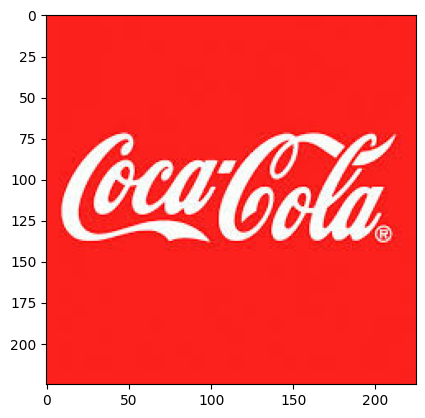

In [16]:
img_bgr = cv2.imread("coco-cola.jpeg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

2. **Read Background image**

(225, 225, 3)


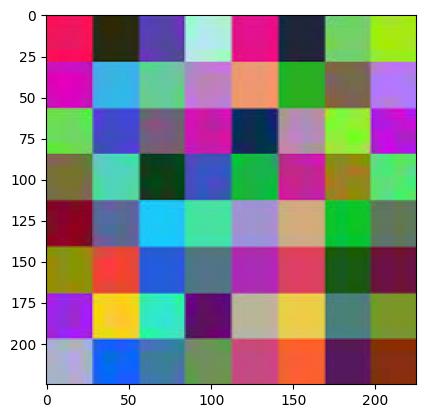

In [21]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("back.jpeg")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width and height to be the same as logo width
dim = (logo_w, logo_w)

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

3. **Create Mask for original Image**

(225, 225)


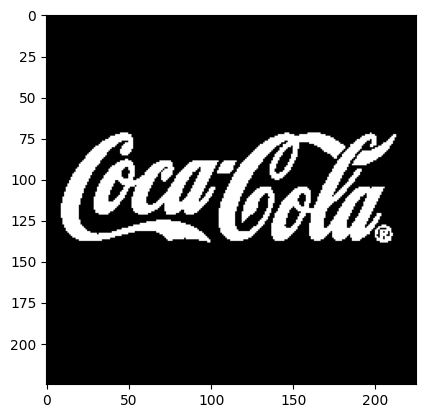

In [18]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

4. **Invert the Mask**

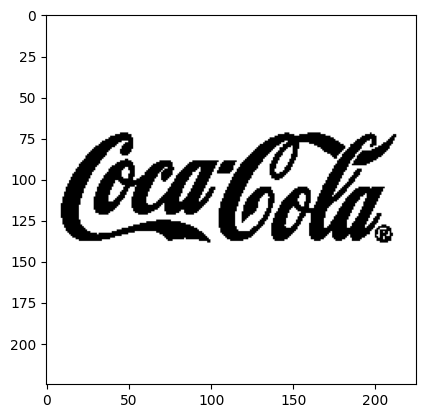

In [19]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

5. **Apply background on the Mask**

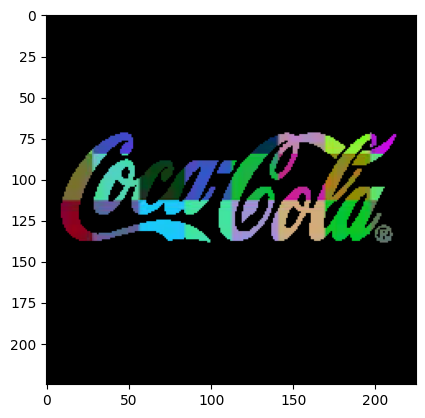

In [22]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

6. **Isolate foreground from image**



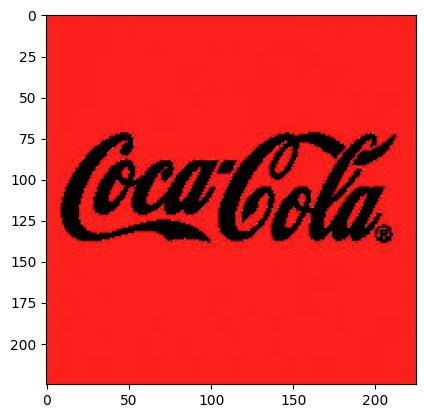

In [23]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)


7. **Result: Merge Foreground and Background**

True

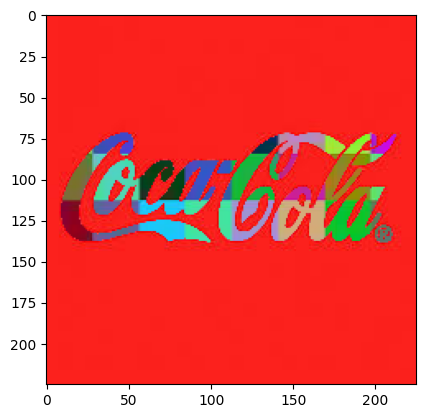

In [24]:
# Add the two previous results obtain the final result
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])